# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = # YOUR CODE HERE
        city_weather = requests.get(city_url).json()
    
        # parsing JSON response
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
       

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | matthew town
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | vondrozo
Processing Record 8 of Set 1 | dryden
Processing Record 9 of Set 1 | piti village
Processing Record 10 of Set 1 | san pedro ayampuc
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | lormi
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | nellikkuppam
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | peniche
City not found. Skipping...
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | port-aux-francais
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()



City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,282.33,76,90,0.45,AU,1712094732
1,hawaiian paradise park,19.5933,-154.9731,299.19,80,75,7.20,US,1712094733
2,adamstown,-25.0660,-130.1015,297.04,73,62,12.48,PN,1712094733
3,matthew town,20.9500,-73.6667,299.59,69,97,7.31,BS,1712094733
4,albany,42.6001,-73.9662,281.38,82,100,0.45,US,1712094734


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,282.33,76,90,0.45,AU,1712094732
1,hawaiian paradise park,19.5933,-154.9731,299.19,80,75,7.20,US,1712094733
2,adamstown,-25.0660,-130.1015,297.04,73,62,12.48,PN,1712094733
3,matthew town,20.9500,-73.6667,299.59,69,97,7.31,BS,1712094733
4,albany,42.6001,-73.9662,281.38,82,100,0.45,US,1712094734


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

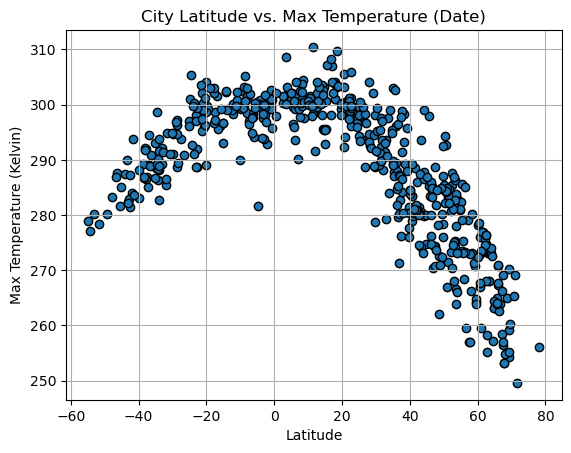

In [15]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

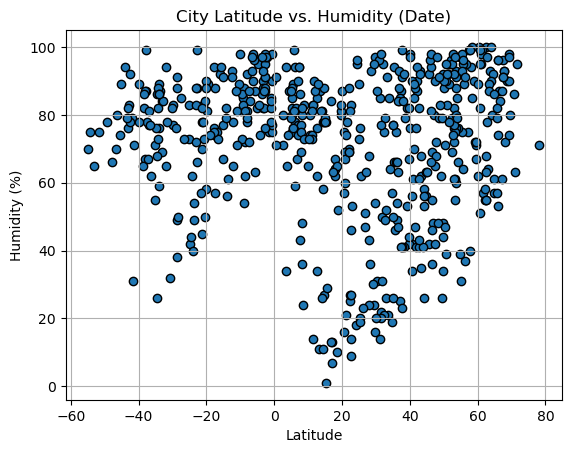

In [11]:

# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

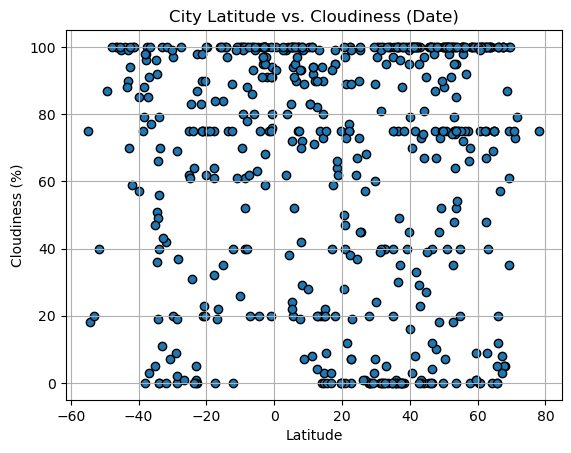

In [12]:

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

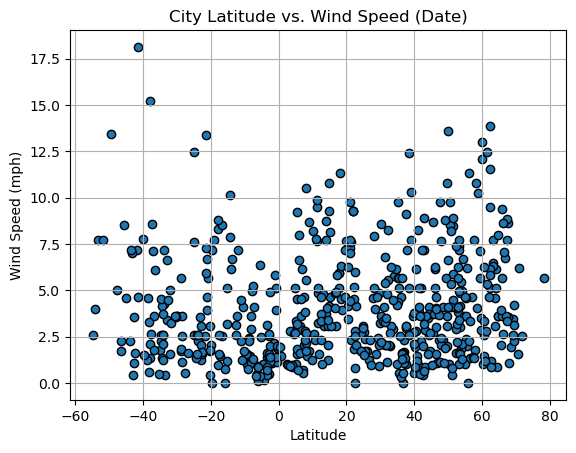

In [13]:

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:


def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Annotate the linear regression equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {rvalue**2:.2f}", (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add legend
    plt.legend()

    
    # Show plot
    plt.show()

In [64]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,as sulayyil,20.4607,45.5779,293.29,50,100,2.20,SA,1712007574
1,kourou,5.1552,-52.6478,302.18,85,89,3.00,GF,1712007862
3,ilulissat,69.2167,-51.1000,271.16,80,75,0.51,GL,1712007507
5,tazovsky,67.4667,78.7000,264.18,95,100,4.13,RU,1712007863
8,shakhtersk,48.0625,38.5167,286.18,51,100,3.12,UA,1712007576


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,296.74,78,97,6.10,PN,1712007507
4,port-aux-francais,-49.3500,70.2167,279.53,79,58,8.54,TF,1712007507
6,bom jardim,-7.7958,-35.5872,298.08,87,76,2.76,BR,1712007575
7,edinburgh of the seven seas,-37.0676,-12.3116,291.72,91,72,9.79,SH,1712007576
10,ta`u,-14.2336,-169.5144,302.19,78,93,10.49,AS,1712007864


###  Temperature vs. Latitude Linear Regression Plot

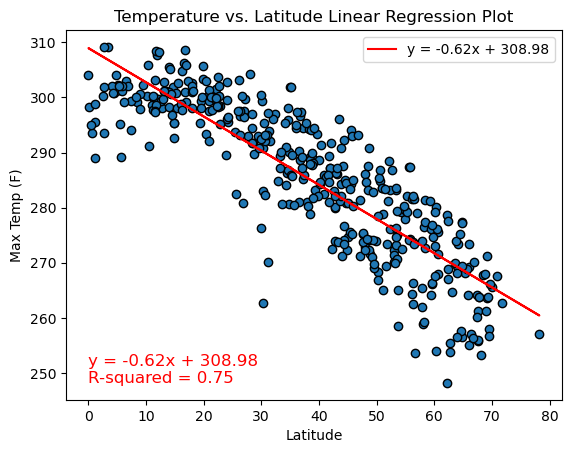

In [66]:


# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (Kelvin)", "Temperature vs. Latitude Linear Regression Plot")



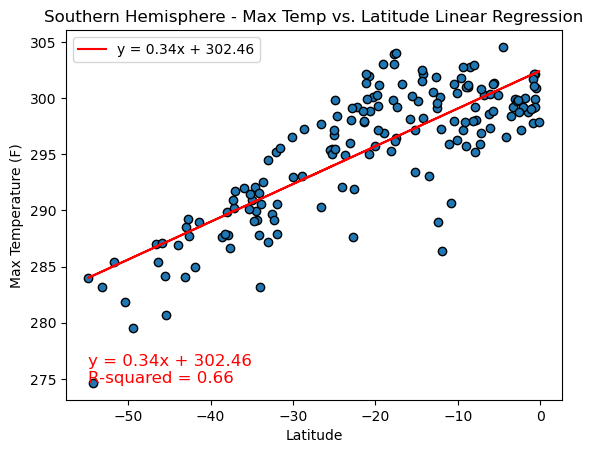

In [75]:

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (Kelvin)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
#****Need to add discussion line

**Discussion about the linear relationship:** 
In the northern hemisphere, there's a pronounced negative correlation, contrasting with the strong positive correlation evident in the southern hemisphere. Additionally, both sets of graphs exhibit remarkable symmetry, with near-mirror reflections of each other. The negative values on the southern hemisphere graph solely denote coordinates. Notably, both graphs share similarities: highest values are clustered around the zero latitude, while lower temperatures extend farther from the equator.

### Humidity vs. Latitude Linear Regression Plot

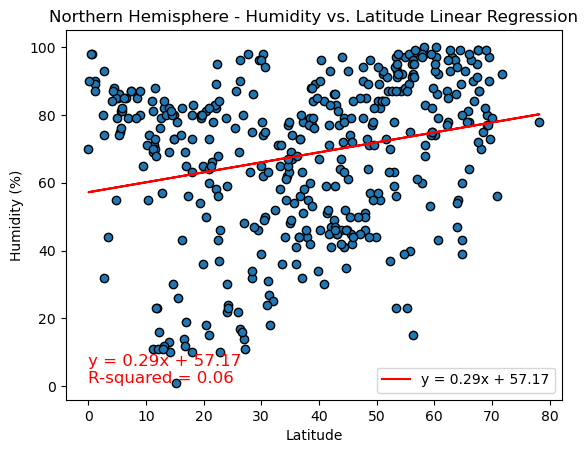

In [76]:

# Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression")

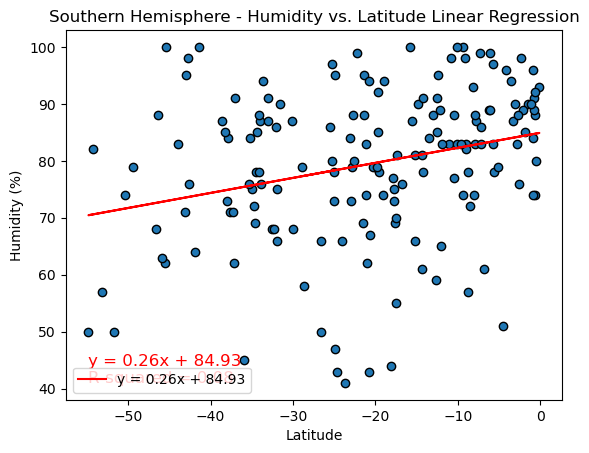

In [77]:

# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression")

**Discussion about the linear relationship:** Surprisingly, unlike the clear correlation observed between temperature and latitude, the distribution of data points for humidity appears more scattered. This observation prompts the question: What implications might this have? Moreover, the linear regression line suggests that latitude might not exert as strong an influence on humidity as it does on temperature.

### Cloudiness vs. Latitude Linear Regression Plot

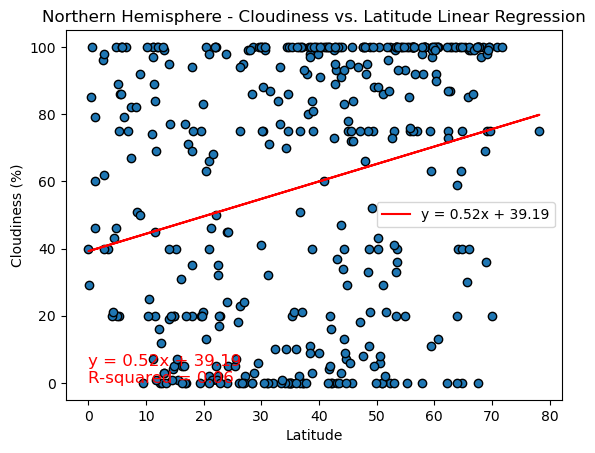

In [80]:


# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

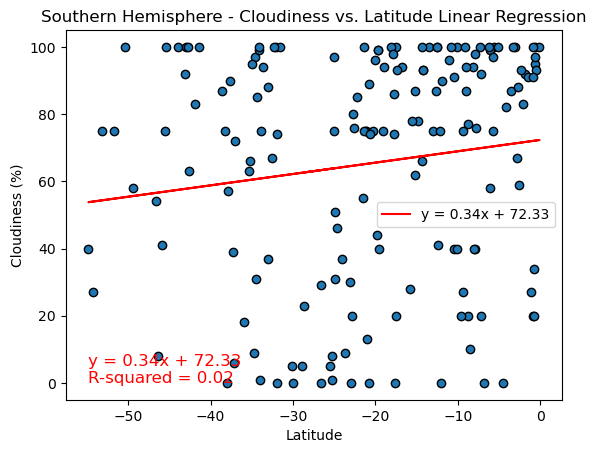

In [79]:

# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


**Discussion about the linear relationship:** There appears to be minimal correlation between cloudiness and latitude. Both diagrams depict a uniform distribution of cloudiness and latitude coordinates, suggesting that latitude exerts little influence on cloudiness in a given location.

### Wind Speed vs. Latitude Linear Regression Plot

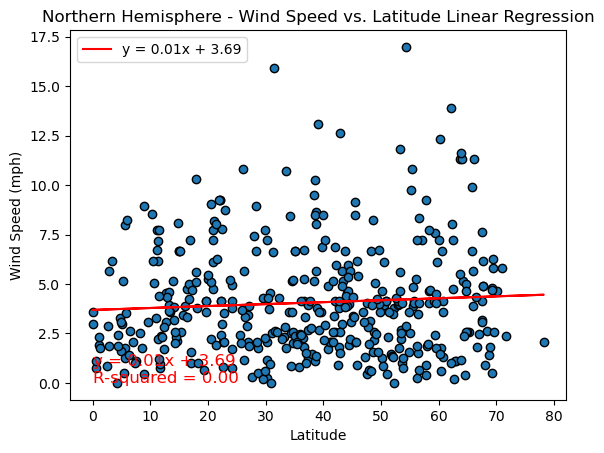

In [82]:

# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")


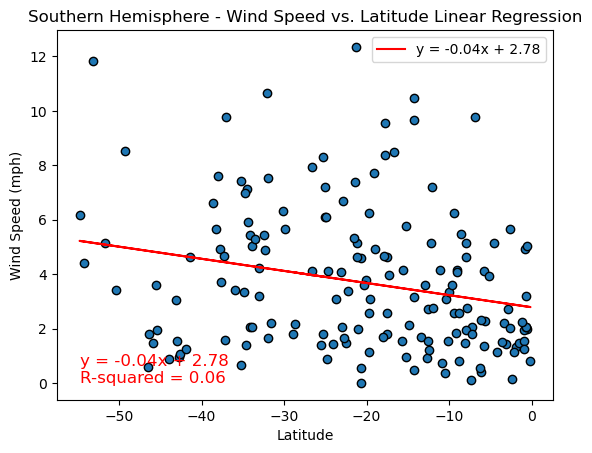

In [81]:

# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

**Discussion about the linear relationship:** Wind speed also exhibits an unusual pattern, as evidenced by the regression lines which indicate minimal correlation. Moreover, the scatter plots display a notable dispersion of data points, further highlighting the complexity of wind speed dynamics